In [22]:
import cv2
from PIL import Image
import os
import glob
import numpy as np
def show(x):
    display(Image.fromarray(x))
original =cv2.imread("img2.bmp", 0)
#load all the numbers and pass them to grey image with threshold

def readreference(img,mask):
    ref = []

    original = cv2.imread(img, 0)
    im_bw, b_original = cv2.threshold(original, 80, 255, cv2.THRESH_BINARY) # pass img to binary
    if mask is None: #create a mask
        mask =np.zeros_like((b_original))
        mask[500:600,900:1400] = 1
    bit = cv2.bitwise_and(b_original,b_original,mask=mask)
    images_numbers  = [cv2.imread(i,0) for i in glob.glob(r"NUMBERS0-9\*.bmp")]
    binary_images_numbers =[cv2.threshold(img,80,255,cv2.THRESH_BINARY)[1] for img in images_numbers] #pass digits to binary images


    for num,i in enumerate(binary_images_numbers): # read binary numbers
        w,h = i.shape[::-1]  #show the width and height 
        res = cv2.matchTemplate(bit,i,cv2.TM_CCOEFF_NORMED)
        threshold = 0.75
        loc = np.where( res >= threshold)
        many= len(loc[0])//4
        previous = [0,0]
        for pt in zip(*loc[::-1]):   #eliminate redundant rectangles
            if (np.abs(pt[0]-previous[0])) <7:
                previous = pt[0],pt[1]
            else:                   #mark numbers with rectangles
                cv2.rectangle(original,(pt[0],pt[1]), (pt[0] + w, pt[1] + h), (0,255,255), 3) #500:600 - 900:1400
                ref.append([num,pt[0]])
            previous = pt[0],pt[1]
    msg = "".join(str(i[0]) for i in ref)
    print("REF:",msg)   #output message
    show(original)



#Example


In [24]:
readreference("img2.bmp",None)

TypeError: readreference() missing 1 required positional argument: 'mask'

REF: 


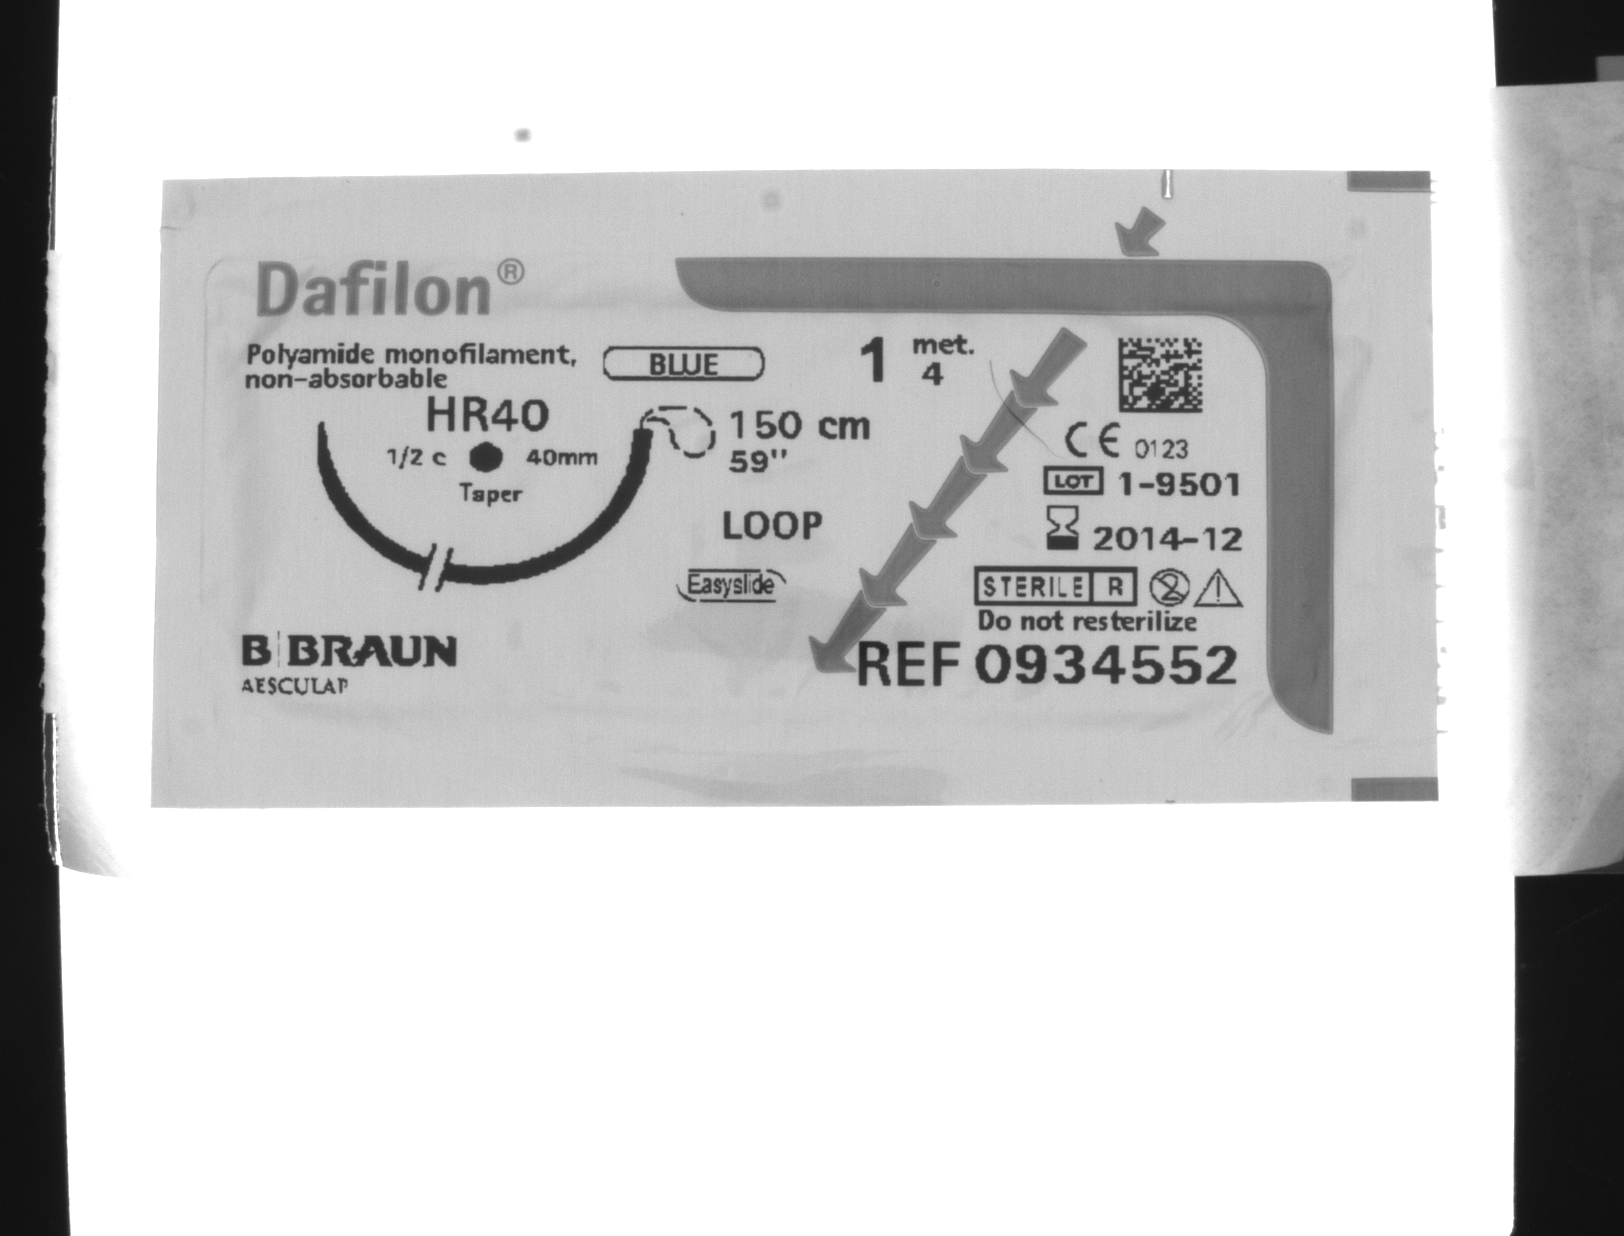

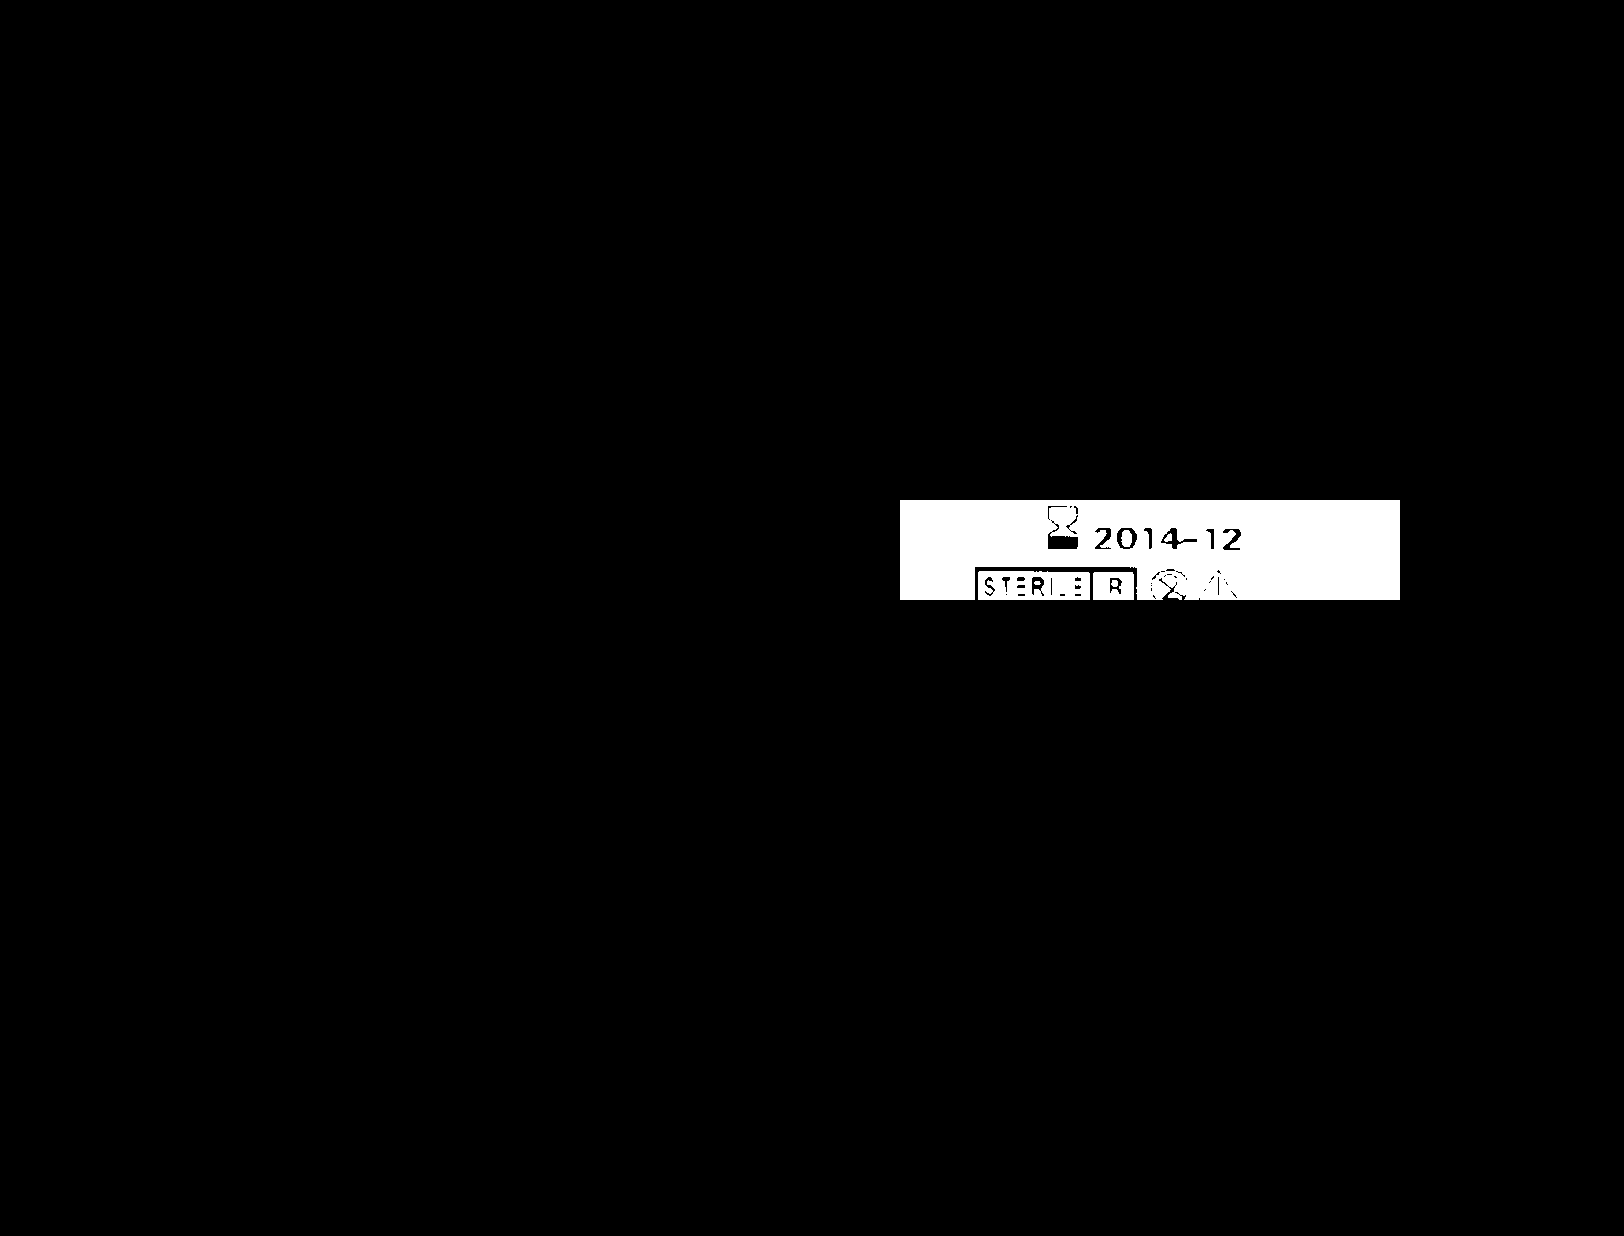

In [10]:
#second image
readreference("perfecta.bmp",None)
